In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Data Reading and Cleaning

In [18]:
df = pd.read_csv('diwali_sales.csv', encoding='unicode_escape')  # or encoding='ISO-8859-1'
df.shape




(11251, 15)

In [19]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [26]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0

In [27]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
df.shape
df.dropna(inplace=True)

In [35]:
df.shape


(11239, 13)

Redefining data


In [38]:
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

### exploring data

gender


In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

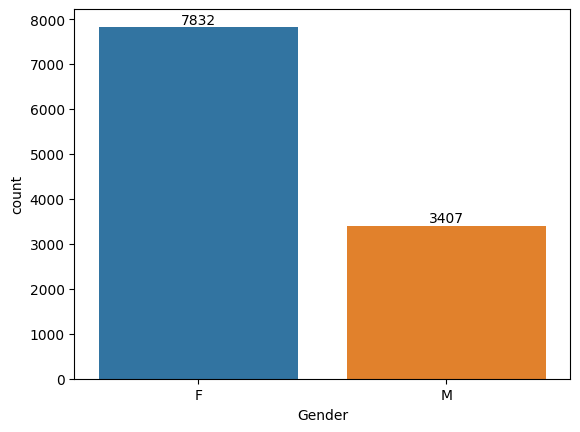

In [44]:
ax=sns.countplot(x='Gender',data=df)    
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

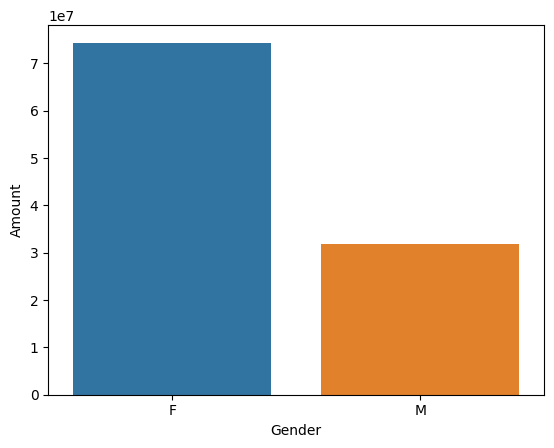

In [50]:
sales_gen=df.groupby(['Gender'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) 
sns.barplot(x='Gender',y='Amount',data=sales_gen)

###### From above graphs we can see that most of the buyers are female and even purchasing power of females is greater

### Age


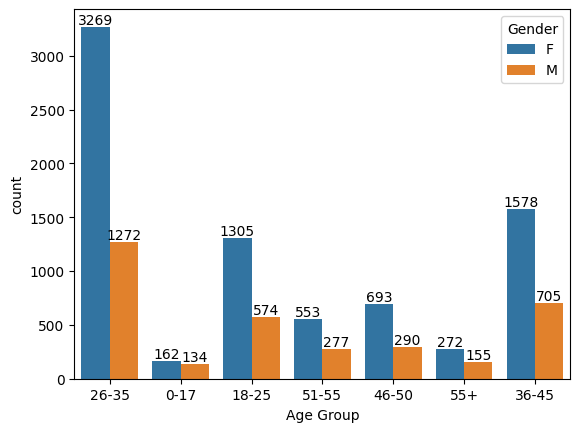

In [60]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')  
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

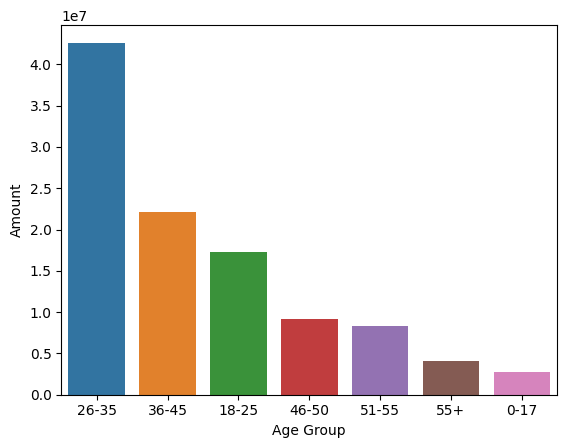

In [62]:
#total amount by age group

sales_age=df.groupby(['Age Group'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y="Amount",data=sales_age)


From above graphs we can predict that most of buyers are of age group [26-35] years female

### State

<Axes: xlabel='State', ylabel='Orders'>

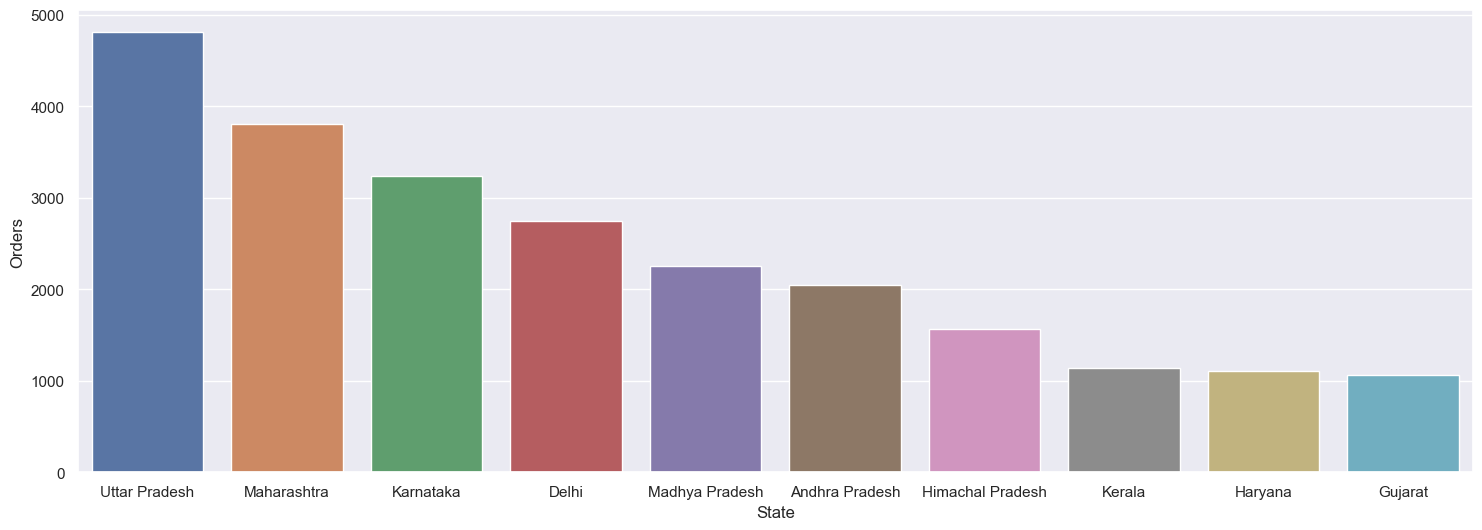

In [73]:
#total number of orders from top 10 states
sales_state=df.groupby(['State'] ,as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

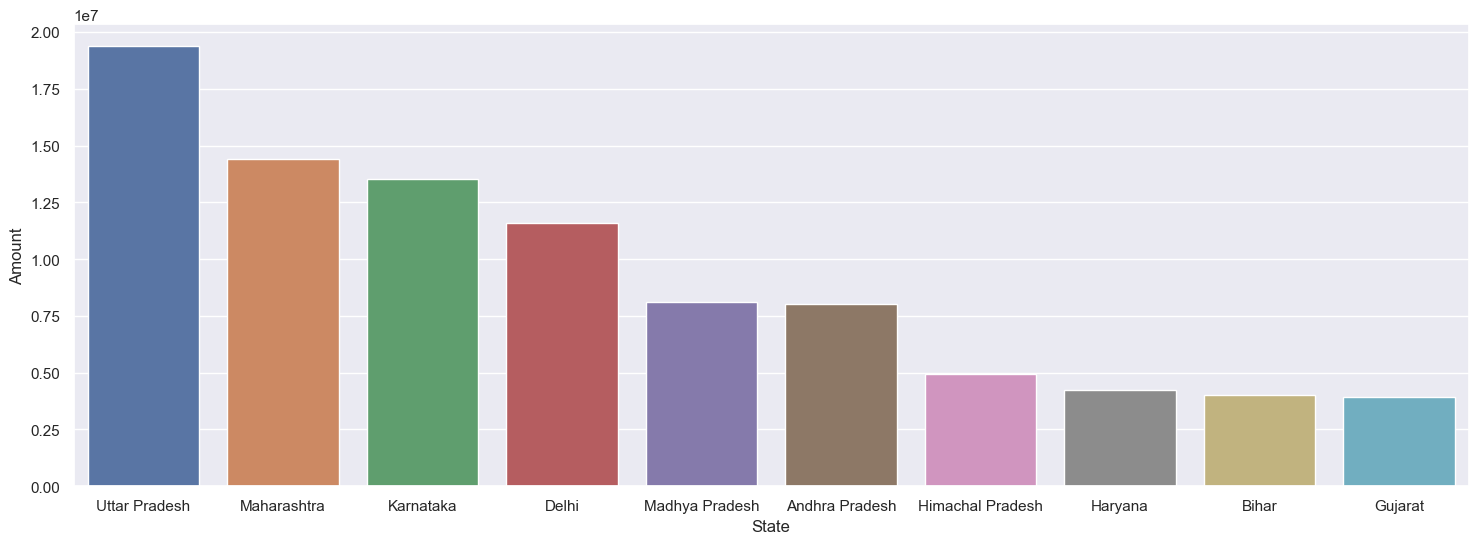

In [75]:
#total amount /sales from top 10 states
sales_state=df.groupby(['State'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='State',y='Amount',data=sales_state)

from above graghs we can state that order from UP, Mh,Ka respectively higher

### Maritial Status

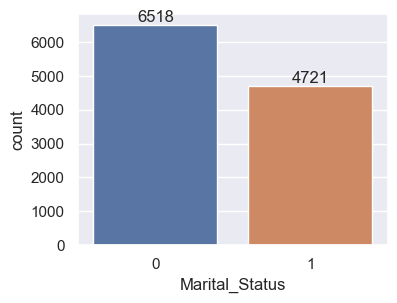

In [88]:
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(8,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

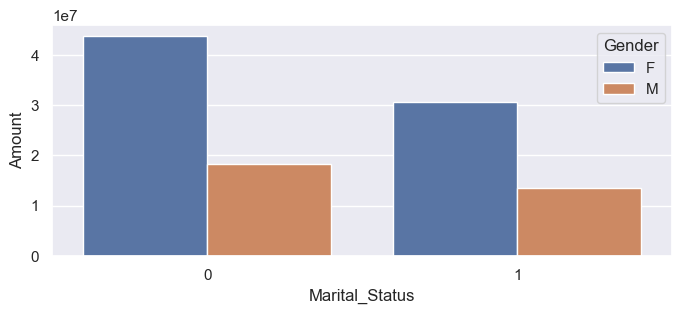

In [82]:
sales_marital=df.groupby(['Marital_Status','Gender'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(8,3)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_marital)

from above graphs we can state that married women has purchased more with higher purchsing power

### Occupation


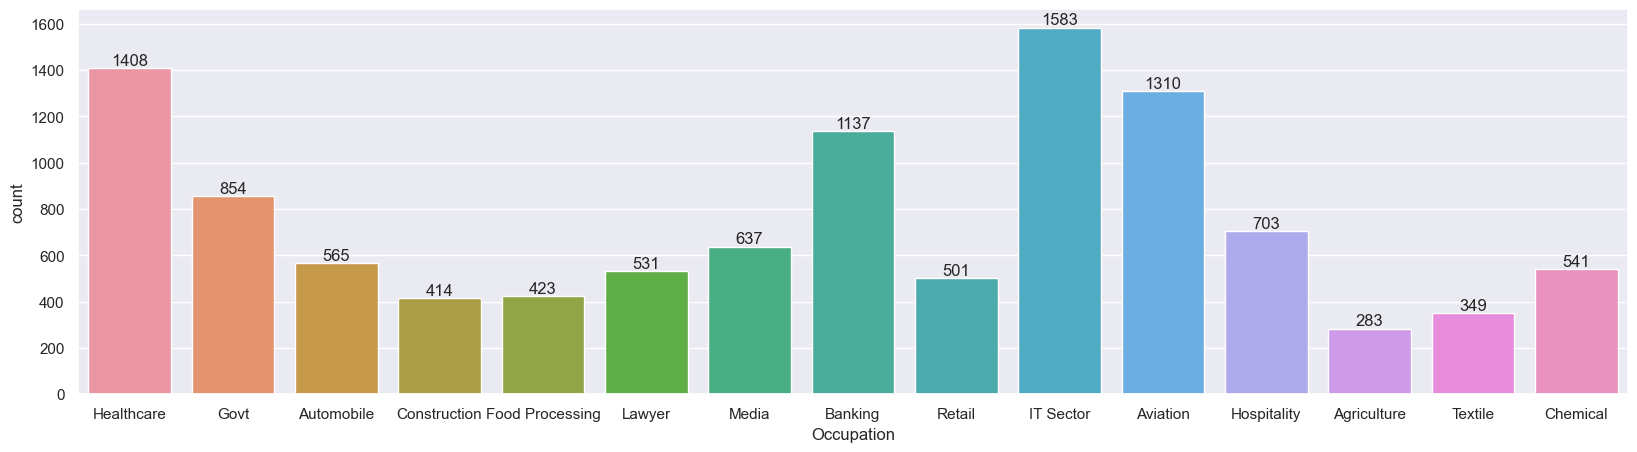

In [90]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

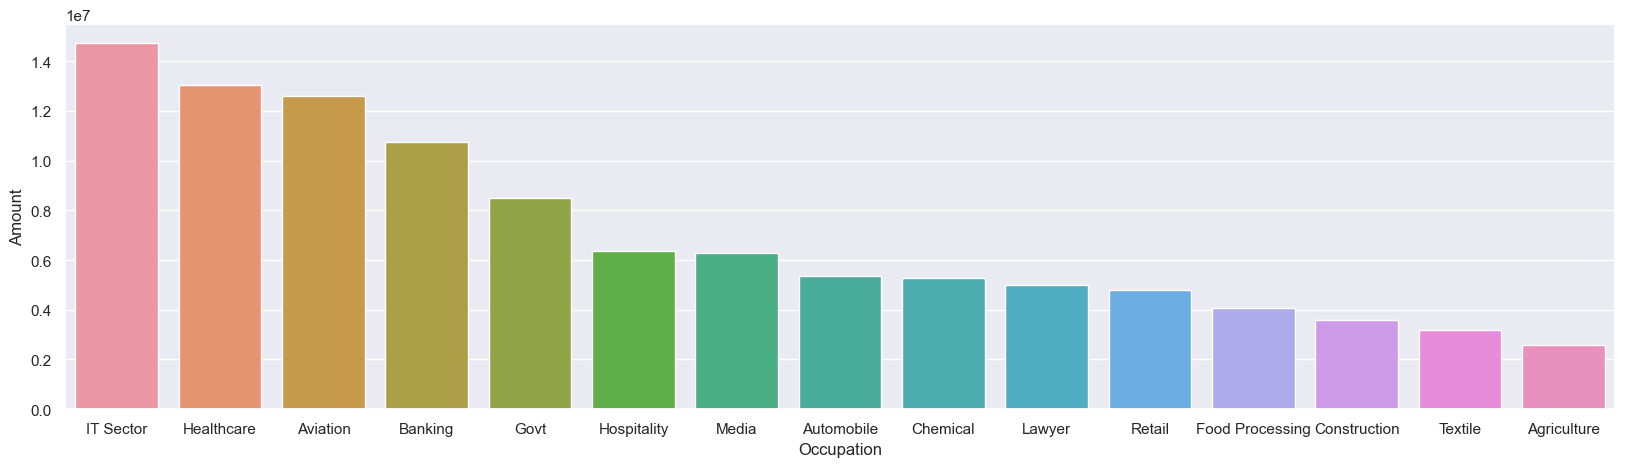

In [91]:
sales_occ=df.groupby(['Occupation'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=sales_occ)

from above we can find most of the buyers are from IT sector >> Healthcare>>Aviation

### product category


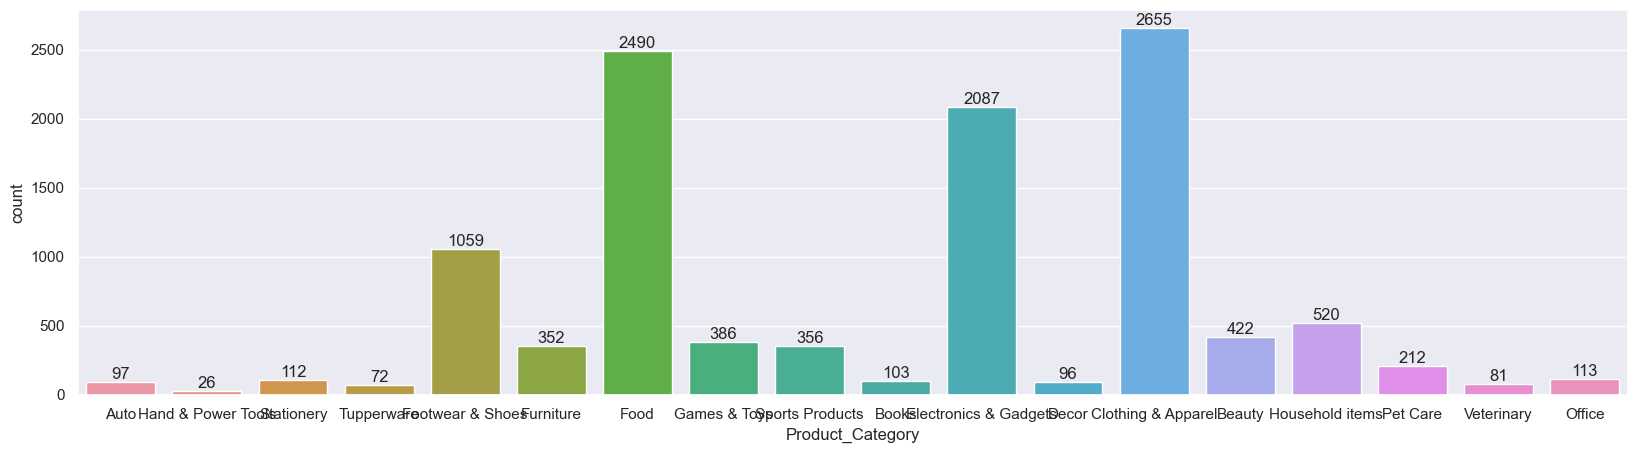

In [95]:
ax=sns.countplot(x='Product_Category',data=df)
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

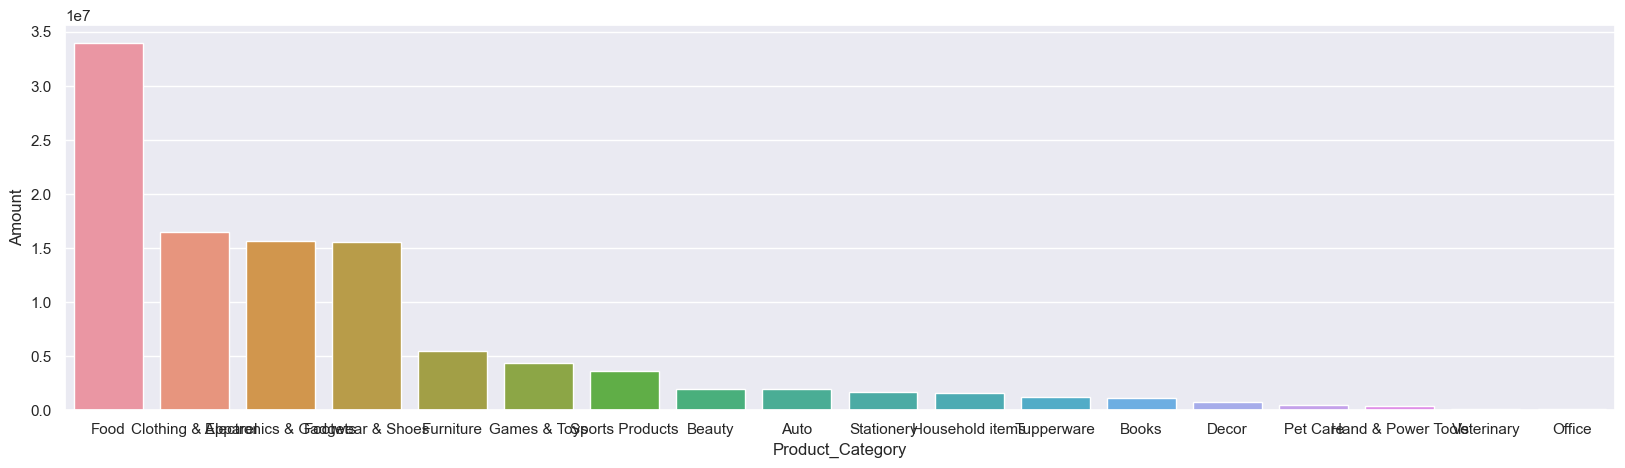

In [97]:
sales_pro=df.groupby(['Product_Category'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Product_Category',y='Amount',data=sales_pro)


 from above graph we can find that most product sold are food , footware and electronics


<Axes: xlabel='Product_ID', ylabel='Orders'>

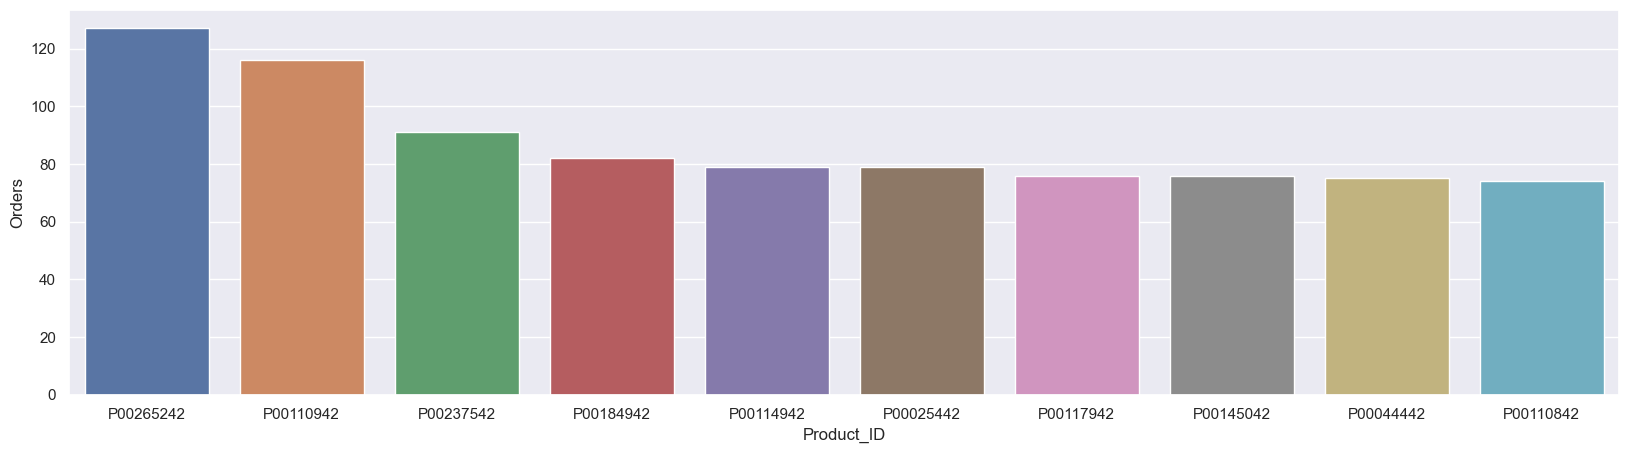

In [99]:
sales_prod=df.groupby(['Product_ID'] ,as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=sales_prod)



<Axes: xlabel='Product_ID'>

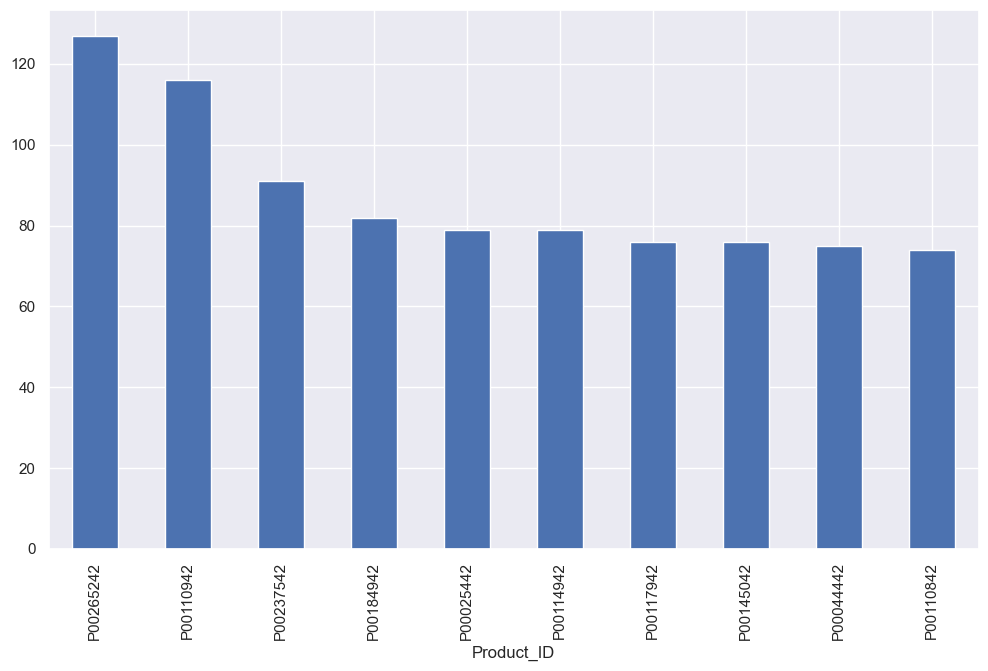

In [102]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# conclusion 

Married women of age group 26-35 years from up ,MH,KA working in IT , Healthcare, Aviation are most likely to buy products from food clothing and electronics.